# Problem 1

In [2]:
# Problem 1A
# Points given: (-1,4), (0,1), (1,2)
# Find linear spline between: y = mx+c
m = (2-1)/(1-0)
c = 2 - m*1
f(x) = m*x+c
#print(f(0) == 1, f(1) == 2) # test
f(1/2) # interpolate

1.5

In [3]:
# Problem 1B
# To find: f(x) = θ1+θ2*x+θ3*x2  
# Linear system of 3 equation, 3 unknowns (thetas)
# Xθ = Y 
# θ = X^-1 * Y
X = [1 -1  1; 1 0 0; 1 1 1]
Y = [4; 1; 2]

using LinearAlgebra
θ = inv(X) * Y
#println("θ:$θ")
f(x) = dot(θ, [1 x x^2]) # approximated function
#print(f(-1)==4, f(0)==1, f(1)==2) # Test
f(1/2) # interpolate

1.0

In [4]:
# c (i)
# Points given: (-1,4), (0,1), (1,2)
using Optim
f(θ,x) = θ[1]+θ[2]*x
F(θ) = (4 - f(θ,-1))^2+(1 - f(θ,0))^2+(2 - f(θ,1))^2 
θ_init = [0.0, 0.0]
res = optimize(F, θ_init)
θ = Optim.minimizer(res)
#println(θ)
# test 
#println(F([2.31 -1]), F([2.33 -1]), F([2.35 -1]))
#println(F([2.33 -0.9]), F([2.33 -1]), F([2.33 -1.1]))
f(θ,1/2)

1.8332970182027688

In [5]:
#c (ii)
F(θ) = (4 - f(θ,-1))^4+(1 - f(θ,0))^4+(2 - f(θ,1))^4
θ_init = [0.0, 0.0]
res = optimize(F, θ_init)
θ = Optim.minimizer(res)
#println(θ)
# test 
#println(F([2.31 -1]), F([2.33 -1]), F([2.35 -1]))
#println(F([2.33 -0.9]), F([2.33 -1]), F([2.33 -1.1]))
f(θ,1/2)

1.6150048803368893

# Problem 2

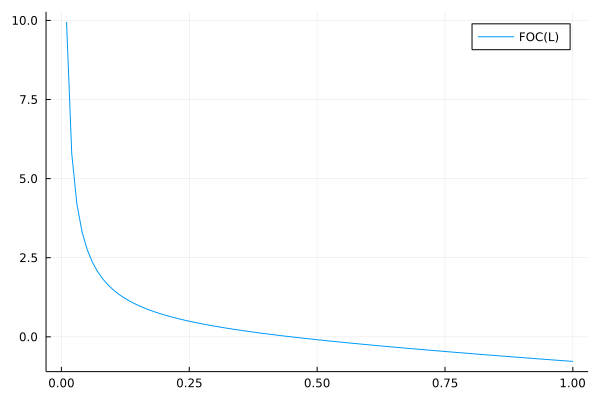

In [6]:
using NLsolve, Plots
α = 1/3
x = 0.5
w = 1
γ = 2
f(l) = (l^α+x)^-1*α*l^(α-1)-w*l^(γ-1) #FOC condition
L = range(0,1,100)
plot(L, f.(L), label = "FOC(L)") 

In [7]:
# Bisection / Binary Search
println(f(0), f(1)) # Inverse signs , condition for bisection
function bisection(f, a, b)
    tol = 1e-07
    m = (a+b)/2
    if norm(a - b)<tol
        return m
        #break
    elseif sign(f(m)) == sign(f(a))
        bisection(f, m, b)
    else 
        bisection(f, a, m)
    end
end
bisection(f, 0, 1)

Inf-0.7777777777777778


0.449068158864975

In [8]:
# Newton Raphson Method
using Calculus
function newtonRaphson(f, x0)
    learning_rate = 0.01
    g = derivative(f)
    N = 1000
    X = zeros(N)
    X[1] = x0
    for i in 1:N-1
        X[i+1] = X[i] - learning_rate*f(X[i])/g(X[i])
    end
    return X
end
X = newtonRaphson(f, 0.25)
print(X[end])
#plot(X, label = "X[n]", title = "NR Guess over Iterations")

0.44905662777605965

# Problem 3

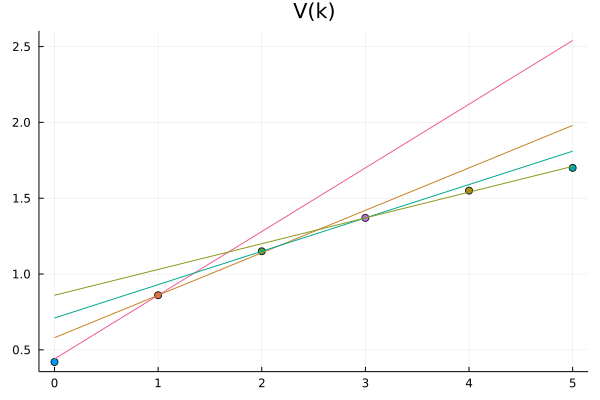

In [9]:
# Given points for V function
x = [0. 1. 2. 3. 4. 5.]
y = [.42 .86 1.15 1.37 1.55 1.70]

# Approximating V using piecewise linear interpolation
function piecewiseLinearInterpolation(x, y)
    b = copy(y[1:end-1])
    a = (y[2:end] - y[1:end-1])./(x[2:end] - x[1:end-1])
    return b, a
end
b, a = piecewiseLinearInterpolation(x,y)

piece1(x) = 0.44 + 0.42*(x-0) # if 0<x<1
piece2(x) = 0.86 + 0.28*(x-1) # if 1<x<2
piece3(x) = 1.15 + 0.22*(x-2) # if 2<x<3
piece4(x) = 1.37 + 0.17*(x-3) # if 3<x<4
piece5(x) = 1.55 + 0.14*(x-4) # if 4<x<5

X = range(0,5,100)
scatter(x, y, label = false, title = "V(k)")
plot!(X, piece1.(X), label = false)
plot!(X, piece2.(X), label = false)
plot!(X, piece3.(X), label = false)
plot!(X, piece4.(X), label = false)

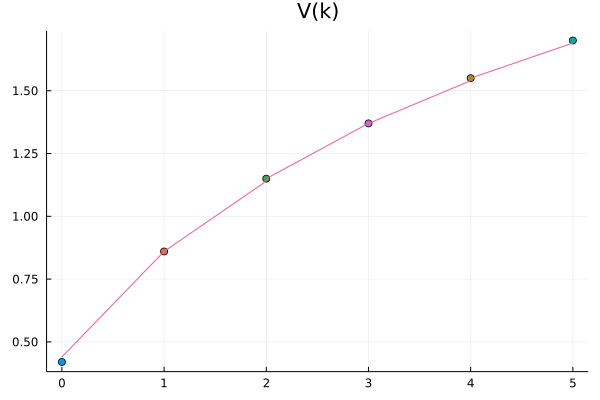

In [11]:
k = 5
β = 0.9

x = [0., 1., 2., 3., 4., 5.]
y = [.42, .86, 1.15, 1.37, 1.55, 1.70]
using Interpolations
V_interp = LinearInterpolation(x, y)
F(kp) = -((k-kp)^(1/2) + β*V_interp(kp)) # negative of the objective
goldenSearch(F, 0.1, k)

LoadError: UndefVarError: goldenSearch not defined

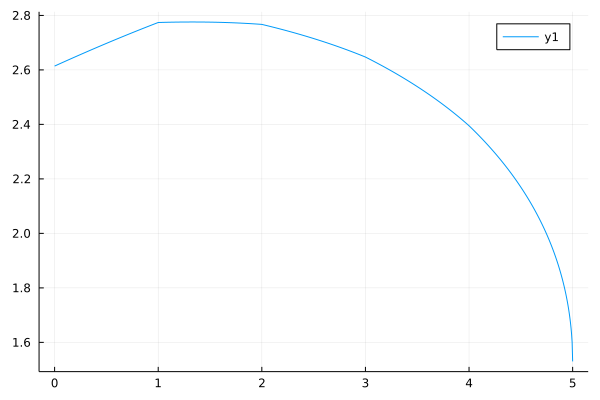

In [12]:
kpgrid = range(0,k,1000)
plot(kpgrid, -F.(kpgrid))

# Problem 4

In [13]:
# V(s) = max u(s-s') + β*V(s')
u(c) = c^0.5
β = 0.98
X = 10

# Grids
N = 2000
LB = 0.01
UB = 10^(1/2)
S = collect(range(LB, UB, N)).^2
Vf = u.(S)

# Contraction Map
function T(V, rule = true)
    TV = zeros(N)
    TS = zeros(N)
    for (i, s) in enumerate(S)
        TV[i], j = findmax(u.(s.-S[S.<=s]) + β*V[S.<=s])
        TS[i] = S[S.<=s][j]
    end
    if rule == true
        return TV, TS
    else 
        return TV  
    end
end

# VFI
for i in 1:100
    plot!(S, Vf)
    TV, TS = T(Vf)
    Vf = TV
end

TV, TS = T(Vf);

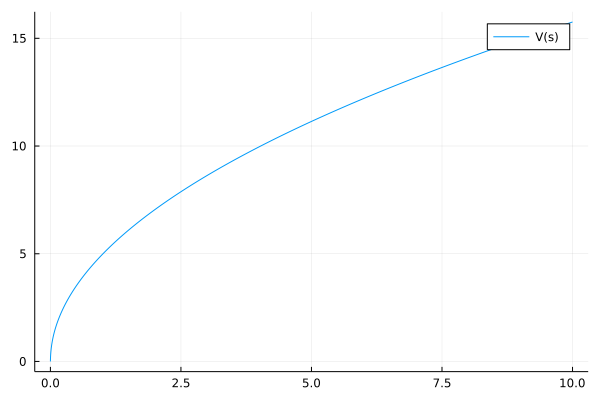

In [14]:
plot(S, Vf, label = "V(s)")

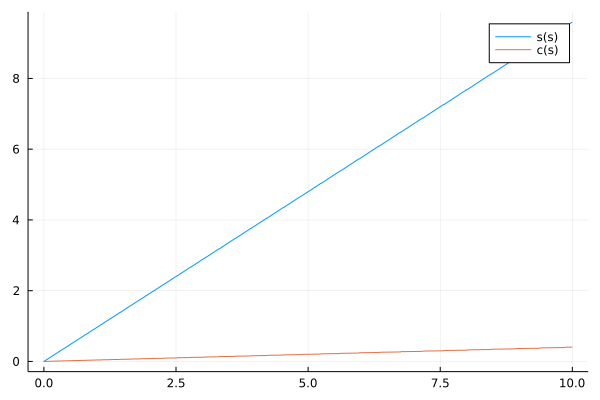

In [154]:
plot(S, TS, label = "s(s)")
plot!(S, S-TS, label = "c(s)")

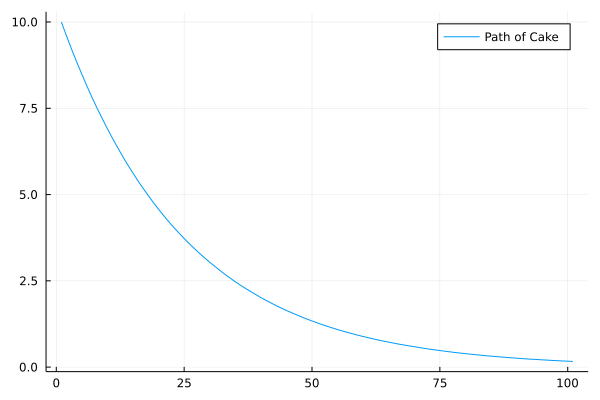

In [155]:
using Interpolations
decisionRule = LinearInterpolation(S, TS)
#plot(S, decisionRule.(S))
#lot!(S, S-decisionRule.(S))

# Simulation
Spath = zeros(101)
Cpath = zeros(100)
Spath[1] = X
for i in 1:100
    Spath[i+1] = decisionRule(Spath[i])
    Cpath[i] = Spath[i] - Spath[i+1]
end

plot(Spath, label = "Path of Cake")

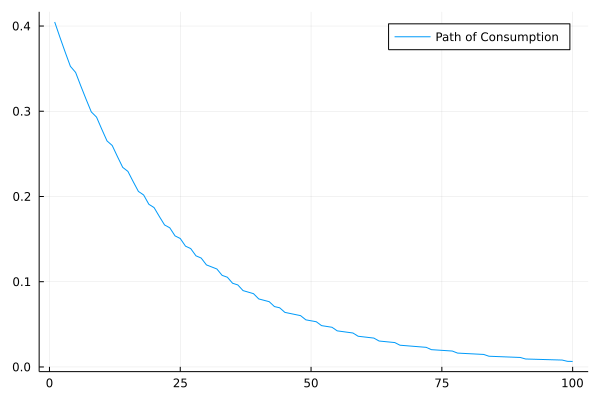

In [156]:
plot(Cpath, label = "Path of Consumption")